<img src="https://media-exp1.licdn.com/dms/image/C4E1BAQEKOIsF4fUeLg/company-background_10000/0?e=2159024400&v=beta&t=URpnngW1v84s3H7co4-iXZ2OsbUZUcdY8pVemsQZ-3g"/>

# Data Set Information
**The dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account.**

# Goal
**We Need To Build a Model for Predicting whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment or Not using Machine Learning Techniques.**

## Steps:
- Import Libraries
- Get the Data
- Data Preprocessing
- Train-Test Split
- Creating and Training the Model
- Predictions
- Residual Analysis
- Evaluating the model

**Let's get started!**

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

## Get the data

In [3]:
data=pd.read_excel('default_of_credit_card_clients.xls')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(30000, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null object
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6             

In [6]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,165760.989333,1.586500,1.833333,1.535900,35.108800,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033,...,42791.362167,39884.398167,38480.350933,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267,0.218733
std,130158.590432,0.513348,0.807699,0.542698,9.851592,1.191215,1.191096,1.162348,1.127519,1.144981,...,64090.316188,60606.644833,59406.836932,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703,0.413394
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2034.000000,1534.000000,1080.000000,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18759.500000,17835.500000,16643.000000,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53572.250000,49804.000000,48863.500000,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

- There are 25 columns in the given dataset.
- There are 30000 rows in the given dataset.
- There are 23 numaric and 2 categorical columns in the given dataset.
- No null values present in the given dataset.

## Data Preprocessing

### Verifying Basic Data Integrity

**The ID column seems like it contains unique identifiers. Now, we need to verify if they are in fact unique throughout the whole dataset or not.**

In [9]:
data['ID'].shape

(30000,)

The total number of rows in the dataset is 30,000.

In [10]:
data['ID'].nunique()

29687

The number of unique entries is 29,687.

**We see here that the number of unique IDs is less than the number of rows. This implies that the ID is not a unique identifier for the rows of the data. So we know that there is some duplication of IDs lets check them...**

In [11]:
id_counts=data['ID'].value_counts()
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

We can see that 29374 IDs occur exactly once, 313 IDs occur twice.

In [12]:
dupe_id = id_counts == 2
dupe_id[0:5]

90f662f9-c1e3    True
129c43ca-42ee    True
634d5510-7240    True
37a1d9c2-701c    True
8b62a9c9-7b64    True
Name: ID, dtype: bool

In [13]:
dupe_ids = id_counts.index[dupe_id]

In [14]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

**The list has a length of 313, which matches our knowledge of the number of duplicate IDs from the value count.**

In [15]:
dupe_ids[0:10]

['90f662f9-c1e3',
 '129c43ca-42ee',
 '634d5510-7240',
 '37a1d9c2-701c',
 '8b62a9c9-7b64',
 'c5a658d0-92da',
 '47d9ee33-0df0',
 '9878723a-0b58',
 '04c32736-903c',
 '0724677e-ec01']

These are first 10 duplicate IDs

**Using the first 10 duplicate IDs, we will plan to first find the rows containing these IDs**

In [16]:
data.loc[data['ID'].isin(dupe_ids[0:10]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
3025,129c43ca-42ee,20000,1,2,1,45,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,19409,0
3125,129c43ca-42ee,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4304,c5a658d0-92da,40000,2,2,1,44,-1,-1,-1,-1,...,4665,4059,5588,4740,922,4665,4059,5588,7000,0
4404,c5a658d0-92da,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4576,04c32736-903c,90000,2,1,2,29,1,-1,-1,-2,...,0,0,0,194,0,0,0,0,217,0
4676,04c32736-903c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10886,0724677e-ec01,120000,2,3,1,47,0,0,0,0,...,16450,18407,15841,2001,2317,1002,3009,1000,1000,0
10986,0724677e-ec01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11769,9878723a-0b58,130000,1,5,1,44,0,0,0,0,...,54668,22780,13417,2452,2140,1093,13706,500,100,1
11869,9878723a-0b58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**What we observe here is that each duplicate ID appears to have one row with what seems like valid data, and one row of entirely zeros. And the index value difference between valid data and duplicate is 100.**

**A row of all zeros is definitely invalid data as it makes no sense for someone to have an age of 0, a credit limit of 0, and so on. So we need to delete the rows with all zeros.**

In [17]:
delete_id=((data==0).iloc[:,1:].all(axis=1))

In [18]:
sum(delete_id)

315

**The output tells us that 315 rows have zeros for every column except the first one. This is greater than the number of duplicate IDs (313), so if we delete all the "zero rows," we may get rid of the duplicate ID problem.**

In [19]:
clean_df1=data.loc[~delete_id,:].copy()

**Here we can clean the DataFrame by eliminating the rows with all zeros. While performing the cleaning operation in the preceding step, we return a new DataFrame called clean_df1. Notice that here we've used the .copy() method after the .loc indexing operation to create a copy of this output, as opposed to a view on the original DataFrame.**

In [20]:
clean_df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Now we want to know if the number of remaining rows is equal to the number of unique IDs.**

In [21]:
clean_df1.shape

(29685, 25)

In [22]:
clean_df1['ID'].nunique()

29685

We can see that we have successfully eliminated duplicates, as the number of unique IDs is equal to the number of rows.

In [23]:
clean_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

In [24]:
clean_df1.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29685.000000,29685.000000,29685.000000,29685.000000,29685.000000,29685.000000,29685.000000,29685.000000,29685.000000,29685.000000,...,29685.000000,29685.000000,29685.000000,29685.000000,2.968500e+04,29685.000000,29685.000000,29685.000000,29685.000000,29685.000000
mean,167519.948796,1.603335,1.852788,1.552198,35.481354,-0.134277,-0.166077,-0.221627,-0.266700,-0.291090,...,43245.439279,40307.628263,38888.682095,5672.886812,5.917545e+03,5229.295570,4826.770827,4805.203840,5219.023008,0.221054
std,129716.478534,0.489214,0.789465,0.521869,9.212199,1.197440,1.197278,1.168278,1.133156,1.150653,...,64276.899483,60787.204536,59588.111810,16616.452239,2.310628e+04,17650.360969,15607.256127,15311.798994,17798.365183,0.414964
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1760.000000,1257.000000,1000.000000,8.320000e+02,390.000000,296.000000,250.000000,115.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19040.000000,18106.000000,17067.000000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54515.000000,50244.000000,49252.000000,5007.000000,5.000000e+03,4508.000000,4015.000000,4041.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [25]:
clean_df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**By observing head() and info(), PAY_1 is actually a Numerical column but it is represented as object let's see why it is an object type column?.**

In [26]:
clean_df1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Here we can see that 3021 columns can be labeled as "Not avaliable"

**Create a new Dataframe by clean the data by eliminating the rows with the missing values of PAY_1.**

In [27]:
clean_df2=clean_df1[clean_df1['PAY_1']!='Not available'].copy()

In [28]:
clean_df2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

**Now convert PAY_1 column from object to Numeric**

In [29]:
clean_df2['PAY_1'] = clean_df2['PAY_1'].astype('int64')
clean_df2[['PAY_1']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 1 columns):
PAY_1    26664 non-null int64
dtypes: int64(1)
memory usage: 416.6 KB


In [30]:
clean_df2.shape

(26664, 25)

**FInally we get a Dataframe with 26664 rows and 25 columns**

## Exploring the Credit Limit and Demographic Features

In [44]:
clean_df2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C0F83FD88>,
      dtype=object)

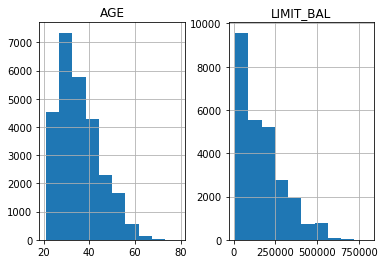

In [31]:
clean_df2[['LIMIT_BAL', 'AGE']].hist()

In [32]:
clean_df2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


- The credit limits have a minimum of 10,000.
-  No one under the age of 21 having a credit account.

In [42]:
clean_df2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

**Education (1 = graduate school; 2 = university; 3 = high school; 4 = others), so we will convert 0,5,6 in the "others" category**

In [43]:
clean_df2['EDUCATION'].replace(to_replace=[0,5,6],value=4,inplace=True)
clean_df2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [45]:
clean_df2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

**MARRIAGE (1 = married; 2 = single; 3 = others), so we will convert 0 in the "others" category**

In [47]:
clean_df2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
clean_df2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

## Implementing OHE for a Categorical Feature

In [48]:
def edu(n):
    if n==1:
        return "graduate school"
    elif n==2:
        return "university"
    elif n==3:
        return "high school"
    else:
        return "others"

**Now we can create a column named "EDUCATION_CAT" by applying "edu" function on "EDUCATION" column.**

In [49]:
clean_df2['EDUCATION_CAT'] = clean_df2['EDUCATION'].apply(edu)

In [51]:
clean_df2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


**Now we can get dummies on "EDUCATION_CAT" column.**

In [52]:
dummies= pd.get_dummies(clean_df2['EDUCATION_CAT'])
dummies.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


**We need to concatenate this new DataFrame with the original one and examine the results side by side. And also save the data into a new CSV file**

In [53]:
df_with_dummies = pd.concat([clean_df2, dummies], axis=1)
df_with_dummies[['EDUCATION_CAT', 'graduate school','high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [54]:
df_with_dummies.to_csv('cleaned_data.csv', index=False)

## Exploring the Financial History Features in the Dataset

**First, let's look at the payment statuses. It is convenient to break these out as a list so we can study them together.**

In [55]:
pay_status=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [56]:
df_with_dummies[pay_status].head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [57]:
df_with_dummies[pay_status].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [60]:
df_with_dummies['PAY_1'].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

**Let's plot the histogram of PAY_1**

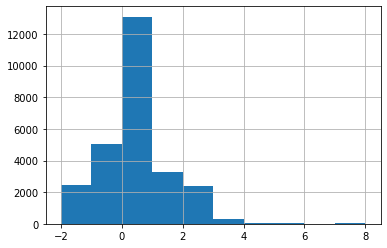

In [62]:
df_with_dummies['PAY_1'].hist()

**Let's plot the histograms of pay_status**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C1D04ECC8>,
      dtype=object)

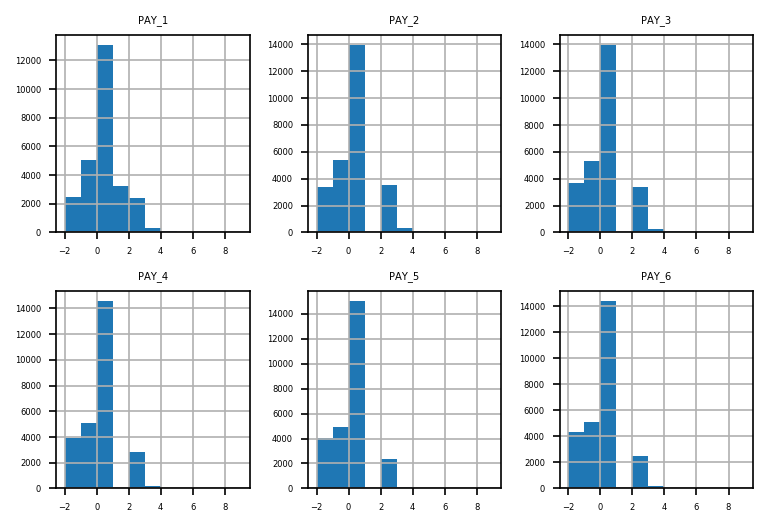

In [87]:
plt.rcParams['figure.dpi'] = 150
df_with_dummies[pay_status].hist(bins=range(-2,10),layout=(2,3))

**Something doesn't seem right? Consider the values between July (PAY_3) and August (PAY_2). In July, there are very few accounts that had a 1-month payment delay; this bar is not really visible in the histogram. However, in August, there are suddenly thousands of accounts with a 2-month payment delay. This does not make sense: the number of accounts with a 2-month delay in a given month should be less than or equal to the number of accounts with a 1-month delay in the previous month. Let's take a closer look at accounts with a 2-month delay in August and see what the payment status was in July.**

In [89]:
df_with_dummies.loc[df_with_dummies['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


In [90]:
df_with_dummies['PAY_2'].value_counts()

 0    13961
-1     5368
 2     3509
-2     3375
 3      289
 4       85
 5       24
 1       24
 7       17
 6       11
 8        1
Name: PAY_2, dtype: int64

In [91]:
df_with_dummies['PAY_3'].value_counts()

 0    13968
-1     5290
-2     3654
 2     3400
 3      214
 4       69
 7       24
 5       20
 6       19
 8        3
 1        3
Name: PAY_3, dtype: int64

**The values doesn't make sense**